<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/48%20%3A%20ML_on_titanic_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
%matplotlib inline

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/avs20/SioLabsPython0/main/datasets/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
y = data['Survived'].values

In [13]:
type(y)

numpy.ndarray

In [14]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [15]:
data.drop(columns = ['Survived'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [16]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [18]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
len(data['Cabin'].unique())

148

In [21]:
data.drop(columns = ['Cabin'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [22]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [23]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
data[['female','male']] = pd.get_dummies(data['Sex'])
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,male,22.0,1,0,7.2500,S,0,1
1,1,female,38.0,1,0,71.2833,C,1,0
2,3,female,26.0,0,0,7.9250,S,1,0
3,1,female,35.0,1,0,53.1000,S,1,0
4,3,male,35.0,0,0,8.0500,S,0,1


In [25]:
pd.get_dummies(data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [26]:
data[['C', 'Q', 'S']] = pd.get_dummies(data['Embarked'])
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [27]:
data.drop(columns =  ['Embarked', 'Sex'], inplace = True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   female  891 non-null    uint8  
 6   male    891 non-null    uint8  
 7   C       891 non-null    uint8  
 8   Q       891 non-null    uint8  
 9   S       891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [29]:
pd.get_dummies(data['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [31]:
data = pd.get_dummies(data, prefix='pclass',columns=['Pclass'])

In [32]:
data.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


now we need to replace missing values of Age

In [33]:
data['Age'].mean()

29.69911764705882

In [34]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   female    891 non-null    uint8  
 5   male      891 non-null    uint8  
 6   C         891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
 9   pclass_1  891 non-null    uint8  
 10  pclass_2  891 non-null    uint8  
 11  pclass_3  891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 34.9 KB


In [39]:
features = data.values
features

array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

## Now get the data and prepare for ML 

In [35]:
np.sum(y)

342

In [36]:
891-342

549

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
# prepare the data for train_test split
trainX, testX, train_y, test_y = train_test_split(features, y, test_size = 0.2, random_state=24)

print(trainX.shape)
print(testX.shape)
print(train_y.shape)
print(test_y.shape)

(712, 12)
(179, 12)
(712,)
(179,)


In [51]:
model = KNeighborsClassifier(n_neighbors=  6)
model.fit(trainX, train_y)
preds = model.predict(testX)
print("accuracy score : ", accuracy_score(test_y, preds))

accuracy score :  0.7262569832402235


In [54]:
accuracy = []
for k in range (1, 50, 2 ):
  model = KNeighborsClassifier(n_neighbors=  k)
  model.fit(trainX, train_y)
  preds = model.predict(testX)
  data = {}
  data['k'] = k
  data['accuracy_score'] = accuracy_score(test_y, preds)
  accuracy.append(data)
  print("accuracy score : ", accuracy_score(test_y, preds))

accuracy score :  0.6815642458100558
accuracy score :  0.7374301675977654
accuracy score :  0.7262569832402235
accuracy score :  0.7486033519553073
accuracy score :  0.7374301675977654
accuracy score :  0.7430167597765364
accuracy score :  0.7374301675977654
accuracy score :  0.7374301675977654
accuracy score :  0.7262569832402235
accuracy score :  0.7150837988826816
accuracy score :  0.7262569832402235
accuracy score :  0.7262569832402235
accuracy score :  0.7374301675977654
accuracy score :  0.7597765363128491
accuracy score :  0.7318435754189944
accuracy score :  0.7262569832402235
accuracy score :  0.7430167597765364
accuracy score :  0.7374301675977654
accuracy score :  0.7318435754189944
accuracy score :  0.7262569832402235
accuracy score :  0.7318435754189944
accuracy score :  0.7318435754189944
accuracy score :  0.7318435754189944
accuracy score :  0.7318435754189944
accuracy score :  0.7318435754189944


In [55]:
results = pd.DataFrame(accuracy)
results.head()

,k,accuracy_score
0,1,0.681564
1,3,0.737430
2,5,0.726257
3,7,0.748603
4,9,0.737430


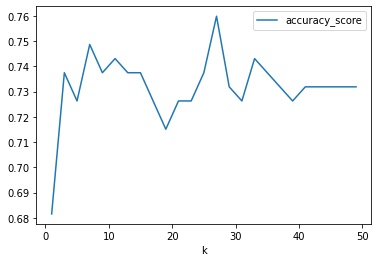

In [56]:
results.plot(kind = 'line', x = 'k', y = 'accuracy_score')

In [57]:
np.argmax(results['accuracy_score'])

13

In [58]:
results.iloc[13,:]

k                 27.000000
accuracy_score     0.759777
Name: 13, dtype: float64

In [59]:
data

{'accuracy_score': 0.7318435754189944, 'k': 49}

In [60]:
features

array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [66]:
features[243].reshape(1,12).shape

(1, 12)

In [64]:
trainX.shape

(712, 12)

In [67]:
model.predict(features[243].reshape(1,12))

array([0])

In [68]:
model.predict(features[512].reshape(1,12))

array([0])

In [70]:
model.predict(features[514].reshape(1,12))

array([0])

In [71]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])